In [9]:
import pandas as pd
import matplotlib as plt
soil_df = pd.read_csv('df_soil_mean_loc.csv')

In [10]:
# bin lead and arsenic 
# Source: http://www.austintexas.gov/page/soil-kitchen-results
soil_df['Lead_Bin'] = pd.cut(soil_df['Lead'], bins=[-1, 3, 500, 2000], labels=["Low", "Mid", "High"])
soil_df['Arsenic_Bin'] = pd.cut(soil_df['Arsenic'], bins=[-1, 5, 24, 100], labels=["Low", "Mid", "High"])

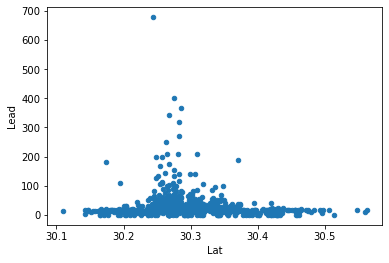

In [15]:
soil_df.plot(x='Lat', y='Lead', kind='scatter')

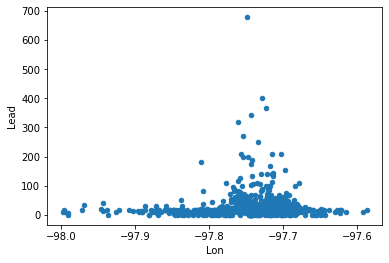

In [17]:
soil_df.plot(x='Lon', y='Lead', kind='scatter')

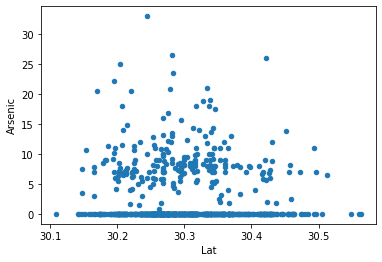

In [18]:
soil_df.plot(x='Lat', y='Arsenic', kind='scatter')

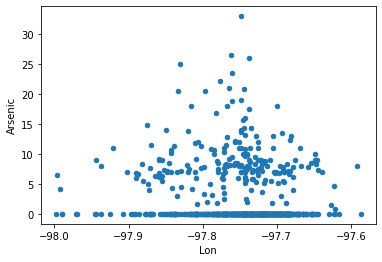

In [19]:
soil_df.plot(x='Lon', y='Arsenic', kind='scatter')

In [20]:
soil_df.describe()

,Unnamed: 0,Lead,Arsenic,Lat,Lon
count,847.000000,847.000000,847.000000,819.000000,819.000000
mean,423.000000,27.216094,2.385090,30.297628,-97.746691
std,244.652134,44.246050,4.630102,0.071572,0.059535
min,0.000000,0.000000,0.000000,30.109070,-97.997680
25%,211.500000,11.700000,0.000000,30.254340,-97.770750
50%,423.000000,16.000000,0.000000,30.284160,-97.740610
75%,634.500000,25.206667,3.387500,30.339530,-97.709215
max,846.000000,678.000000,33.000000,30.562580,-97.586850


In [21]:
soil_df['Lead_Standardized'] = (soil_df['Lead']-soil_df['Lead'].mean())/soil_df['Lead'].std()
soil_df['Arsenic_Standardized'] = (soil_df['Arsenic']-soil_df['Arsenic'].mean())/soil_df['Arsenic'].std()

In [22]:
soil_df.head()

,Unnamed: 0,Intersection,Lead,Arsenic,Lat,Lon,Lead_Bin,Arsenic_Bin,Lead_Standardized,Arsenic_Standardized
0,0,10th @ Menden,24.00,0.00,30.27069,-97.73753,Mid,Low,-0.072687,-0.515127
1,1,10th @ Prospect -- Back,98.00,0.00,30.26427,-97.71782,Mid,Low,1.599779,-0.515127
2,2,10th @ Prospect -- Front,51.00,0.00,30.26427,-97.71782,Mid,Low,0.537537,-0.515127
3,3,10th St.@Theresa Ave,62.00,9.11,30.28143,-97.76490,Mid,Mid,0.786147,1.452432
4,4,10th@Northwestern,19.37,0.00,30.26604,-97.71402,Mid,Low,-0.177329,-0.515127
